In [1]:
import os,contextlib,random,string
import numpy as np

In [2]:
def wrap_dm(model, ignore_columns = ['label', 'id']):
  
  def wrapper(dataframe):
    data = dataframe.copy().drop([c for c in ignore_columns if c in dataframe.columns], axis = 1)
    
    data['id'] = np.arange(len(dataframe))
    
    tmp_name = "./{}.csv".format("".join([random.choice(string.ascii_lowercase) for _ in range(10)]))
    data.to_csv(tmp_name, index = False)
    
    with open(os.devnull, 'w') as devnull:
      with contextlib.redirect_stdout(devnull):
        data_processed = dm.data.process_unlabeled(tmp_name, trained_model = model)
        out_proba = model.run_prediction(data_processed, output_attributes = True)
        out_proba = out_proba['match_score'].values.reshape(-1)
    
    multi_proba = np.dstack((1-out_proba, out_proba)).squeeze()
    
    os.remove(tmp_name)
    return multi_proba
  return wrapper

In [3]:
from mojito import Mojito, chart
import pandas as pd
import deepmatcher as dm

In [19]:
data = pd.read_csv('datasets/Structured/DBLP-ACM/merged_test.csv',dtype=str)
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('models/dblp_acm_hybrid.pth')
proba = wrap_dm(model)(data)
tp_group = data[(proba[:, 1] >= 0.5) & (data['label'] == '1')]
tn_group = data[(proba[:, 0] >= 0.5) & (data['label'] == '0')]

len(tp_group), len(tn_group)

(442, 2012)

In [20]:
mojito = Mojito(data.columns,
                attr_to_copy = 'left',
                split_expression = " ",
                class_names = ['no_match', 'match'], 
                feature_selection = "lasso_path")

In [22]:
tp_result = mojito.drop(wrap_dm(model),
                        tp_group,
                        num_features = 20,
                        num_perturbation = 100)

Explaining 0/442
Explaining 1/442
Explaining 2/442
Explaining 3/442
Explaining 4/442
Explaining 5/442
Explaining 6/442
Explaining 7/442
Explaining 8/442
Explaining 9/442
Explaining 10/442
Explaining 11/442
Explaining 12/442
Explaining 13/442
Explaining 14/442
Explaining 15/442
Explaining 16/442
Explaining 17/442
Explaining 18/442
Explaining 19/442
Explaining 20/442
Explaining 21/442
Explaining 22/442
Explaining 23/442
Explaining 24/442
Explaining 25/442
Explaining 26/442
Explaining 27/442
Explaining 28/442
Explaining 29/442
Explaining 30/442
Explaining 31/442
Explaining 32/442
Explaining 33/442
Explaining 34/442
Explaining 35/442
Explaining 36/442
Explaining 37/442
Explaining 38/442
Explaining 39/442
Explaining 40/442
Explaining 41/442
Explaining 42/442
Explaining 43/442
Explaining 44/442
Explaining 45/442
Explaining 46/442
Explaining 47/442
Explaining 48/442
Explaining 49/442
Explaining 50/442
Explaining 51/442
Explaining 52/442
Explaining 53/442
Explaining 54/442
Explaining 55/442
Ex

Explaining 437/442
Explaining 438/442
Explaining 439/442
Explaining 440/442
Explaining 441/442


In [23]:
tn_result = mojito.copy(wrap_dm(model),
                        tn_group,
                        num_features = 20,
                        num_perturbation = 100)

Explaining 0/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.627e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.313e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.514e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.257e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.817e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.817e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 3/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.868e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.934e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 4/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.888e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.444e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 5/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.660e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.830e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 6/2012
Explaining 7/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.526e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.263e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 8/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.311e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.156e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 9/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.327e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.664e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 10/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.787e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.394e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 11/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.492e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.746e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 12/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.387e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.694e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 13/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.379e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.689e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 14/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.977e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.977e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 15/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.458e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.404e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 16/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.243e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.925e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 17/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.815e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.908e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 18/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.876e-02, previous alpha=1.497e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 19/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.773e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.752e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 20/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.683e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.841e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 21/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.911e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.955e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 22/2012
Explaining 23/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.744e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.872e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 24/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.192e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.241e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 25/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.095e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.408e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 26/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.465e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.233e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 27/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.285e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.142e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 28/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.341e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.671e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 29/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.005e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.665e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 30/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.858e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 31/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.678e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.839e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 32/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.086e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.043e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 33/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.456e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.228e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 34/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.137e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.038e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 35/2012
Explaining 36/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.826e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.913e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 37/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.190e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.930e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 38/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.889e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.903e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 39/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.406e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.203e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 40/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.063e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.928e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 41/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.127e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.063e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 42/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.049e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.459e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 43/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.182e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.869e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 44/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.026e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.862e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 45/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.942e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.368e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 46/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.976e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.976e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 47/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.580e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.290e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 48/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=7.911e-03, previous alpha=7.911e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 49/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.794e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.052e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 50/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.497e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.749e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 51/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.200e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.100e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 52/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.479e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.395e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 53/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.138e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.569e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 54/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.482e-05, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.741e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 55/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.575e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.288e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 56/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.492e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.480e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 57/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.268e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.337e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 58/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.109e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.893e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 59/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.921e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.961e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 60/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.709e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.855e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 61/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.124e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.562e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 62/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.134e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.286e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 63/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.520e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.376e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 64/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.258e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.573e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 65/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.904e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.452e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 66/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.896e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=2.359e-02, previous alpha=1.041e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 67/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.756e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.378e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 68/2012
Explaining 69/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.028e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.014e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 70/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.823e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.912e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 71/2012
Explaining 72/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.736e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.736e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 73/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.768e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.768e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 74/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.517e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.171e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 75/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.331e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.654e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 76/2012
Explaining 77/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.006e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.003e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 78/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.125e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.063e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 79/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.369e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.185e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 80/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.347e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.948e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 81/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.613e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.807e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 82/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.966e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.483e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 83/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.330e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.165e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 84/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.957e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.979e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 85/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.684e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.342e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 86/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.823e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.911e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 87/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.183e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.591e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 88/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=4.032e-02, previous alpha=1.125e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 89/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.521e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.603e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 90/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.773e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.085e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 91/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.402e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.972e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 92/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=8.026e-03, previous alpha=8.026e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 93/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.045e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.523e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 94/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.284e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 95/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.122e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.061e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 96/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.556e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.778e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 97/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.493e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.246e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 98/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.860e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.430e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 99/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.053e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.082e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 100/2012
Explaining 101/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.138e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.069e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 102/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.597e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.798e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 103/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.309e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.309e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 104/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.934e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.575e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 105/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.784e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.392e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 106/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.718e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.359e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 107/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.582e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.452e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 108/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.017e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.508e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 109/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.402e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.128e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 110/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.861e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.861e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 111/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.173e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.487e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 112/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.894e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.947e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 113/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.626e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.313e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 114/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.825e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.483e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 115/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.831e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.302e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 116/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.358e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.679e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 117/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=9.948e-03, previous alpha=2.947e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 118/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.508e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.254e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 119/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.996e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.998e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 120/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.049e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.024e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 121/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.118e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.888e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 122/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.318e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.659e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 123/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.707e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.854e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 124/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.468e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.234e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 125/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.184e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.092e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 126/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.622e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.411e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 127/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.863e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.931e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 128/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.714e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.487e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 129/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.517e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.259e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 130/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.065e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.033e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 131/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.251e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.126e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 132/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.262e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.631e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 133/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.745e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.372e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 134/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.126e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.063e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 135/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.839e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.920e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 136/2012
Explaining 137/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.641e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.207e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 138/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.829e-02, previous alpha=1.829e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 139/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.999e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.104e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 140/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.648e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.824e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 141/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.848e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.924e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 142/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.260e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.630e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 143/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.087e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.543e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 144/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.832e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.832e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 145/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.723e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.029e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 146/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.000e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.000e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 147/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.307e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.305e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 148/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.629e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.629e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 149/2012
Explaining 150/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.497e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.026e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 151/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.288e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.591e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 152/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.705e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.705e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 153/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.361e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.180e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 154/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.295e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.295e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 155/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.149e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.075e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 156/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.458e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.458e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 157/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.701e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.350e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 158/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.134e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.332e-03, previous alpha=7.134e-04, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 159/2012
Explaining 160/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.089e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.794e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 161/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.056e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.528e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 162/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.378e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.826e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 163/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.332e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.661e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 164/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.442e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.221e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 165/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.731e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.866e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 166/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.750e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.569e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 167/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.370e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.185e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 168/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.901e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.708e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 169/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.420e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.248e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 170/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.199e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.917e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 171/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.702e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.851e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 172/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.791e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.956e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 173/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.082e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.041e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 174/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.161e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.116e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 175/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.105e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.553e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 176/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.272e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.339e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 177/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.049e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.024e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 178/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.524e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.652e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 179/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.626e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.313e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 180/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.461e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.231e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 181/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.122e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.061e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 182/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.567e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.567e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 183/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.315e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.658e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 184/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.899e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.449e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 185/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=9.126e-04, previous alpha=9.126e-04, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 186/2012
Explaining 187/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.500e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.250e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 188/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.202e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.601e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 189/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.635e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.485e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 190/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.739e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.870e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 191/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.764e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.819e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 192/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.849e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.849e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 193/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.804e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.804e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 194/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.037e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.518e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 195/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.478e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.739e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 196/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.066e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.109e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 197/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.991e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.996e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 198/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.697e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.484e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 199/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.792e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.396e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 200/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.312e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.656e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 201/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.200e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.600e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 202/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.175e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.088e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 203/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.868e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.338e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 204/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.421e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.106e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 205/2012
Explaining 206/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.384e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.692e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 207/2012
Explaining 208/2012
Explaining 209/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.985e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.492e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 210/2012
Explaining 211/2012
Explaining 212/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.438e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.219e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 213/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.318e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.318e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 214/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.323e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.323e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 215/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=2.049e-03, previous alpha=2.049e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 216/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.151e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.076e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 217/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.892e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.601e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 218/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.535e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.064e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 219/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.806e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.911e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 220/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.630e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.151e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 221/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.533e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.533e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 222/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.248e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.124e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 223/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.709e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.709e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 224/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.000e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.500e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 225/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.674e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.424e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 226/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.017e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.509e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 227/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.390e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.110e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 228/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.636e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.318e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 229/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.198e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.992e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 230/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.151e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.576e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 231/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.221e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.849e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 232/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.645e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.223e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 233/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.784e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.918e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 234/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.350e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.350e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 235/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.136e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.560e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 236/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.421e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.211e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 237/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.247e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.124e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 238/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.422e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.111e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 239/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.321e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.605e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 240/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.141e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.141e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 241/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.462e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.462e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 242/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.778e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.389e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 243/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=9.551e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=4.775e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 244/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.526e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.263e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 245/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.105e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.053e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 246/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.238e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.238e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 247/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.956e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.978e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 248/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.073e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.035e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 249/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.471e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.735e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 250/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.731e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.366e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 251/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.030e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.030e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 252/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.307e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.535e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 253/2012
Explaining 254/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.457e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.729e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 255/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.722e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.361e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 256/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.112e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.558e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 257/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.336e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.668e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 258/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.710e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.549e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 259/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.968e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.484e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 260/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.623e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.311e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 261/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.368e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.684e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 262/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.391e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.196e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 263/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.523e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.762e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 264/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.070e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.535e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 265/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.970e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.485e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 266/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.216e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.108e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 267/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.515e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.090e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 268/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.458e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.229e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 269/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.831e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.831e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 270/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.003e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.502e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 271/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.987e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.987e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 272/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.145e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.572e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 273/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.299e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.299e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 274/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.791e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.129e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 275/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=3.804e-03, previous alpha=3.804e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 276/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.434e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.217e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 277/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=3.299e-02, previous alpha=1.218e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 278/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.855e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.427e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 279/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.888e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.444e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 280/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.305e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.653e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 281/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.616e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.258e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 282/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.261e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.358e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 283/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.808e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.808e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 284/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.608e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.246e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 285/2012
Explaining 286/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.826e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.527e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 287/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=3.616e-02, previous alpha=3.389e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 288/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.791e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.896e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 289/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.907e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.454e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 290/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.634e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.172e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 291/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.146e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.073e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 292/2012
Explaining 293/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.678e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.839e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 294/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.112e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.556e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 295/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.544e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.772e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 296/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.684e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.421e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 297/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.674e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.950e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 298/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.125e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.625e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 299/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.928e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.862e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 300/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.143e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.571e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 301/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.927e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.464e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 302/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.080e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.040e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 303/2012
Explaining 304/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.712e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.856e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 305/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.110e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.590e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 306/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.440e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.220e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 307/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.263e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.132e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 308/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.562e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.781e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 309/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.551e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.275e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 310/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.617e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.086e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 311/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.389e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.086e-02, previous alpha=9.389e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 312/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.469e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.235e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 313/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=7.452e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.924e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 314/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.955e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.478e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 315/2012
Explaining 316/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.161e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.580e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 317/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.581e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.290e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 318/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.378e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.441e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 319/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.352e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.176e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 320/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.273e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.136e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 321/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.898e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.949e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 322/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=3.611e-02, previous alpha=1.217e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 323/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.462e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.255e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 324/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.277e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.639e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 325/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.760e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.380e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 326/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.427e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.496e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 327/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.948e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.974e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 328/2012
Explaining 329/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.366e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.683e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 330/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.157e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.787e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 331/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.110e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.110e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 332/2012
Explaining 333/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.989e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.494e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 334/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.075e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.206e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 335/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.577e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.887e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 336/2012
Explaining 337/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.555e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.365e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 338/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.178e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.589e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 339/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.828e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.828e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 340/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.779e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.390e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 341/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.855e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.928e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 342/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.228e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.614e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 343/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.227e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.113e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 344/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.696e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.696e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 345/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.805e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.902e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 346/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.152e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.576e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 347/2012
Explaining 348/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.025e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.013e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 349/2012
Explaining 350/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.673e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.182e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 351/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.337e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.169e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 352/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.059e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.529e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 353/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.305e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.652e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 354/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.274e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.274e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 355/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.204e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.602e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 356/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.426e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.213e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 357/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.279e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.140e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 358/2012
Explaining 359/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.794e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.970e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 360/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.956e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.478e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 361/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.636e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.818e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 362/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.168e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.940e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 363/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.156e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.781e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 364/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.381e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.534e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 365/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.742e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.433e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 366/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.527e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.527e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 367/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.256e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.256e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 368/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.760e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.880e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 369/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.977e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.698e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 370/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.570e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.570e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 371/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.101e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.551e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 372/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.651e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.825e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 373/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.566e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.763e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 374/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.218e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.090e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 375/2012
Explaining 376/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.215e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.107e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 377/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.299e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.650e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 378/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.523e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.761e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 379/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.995e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.997e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 380/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.691e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.548e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 381/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.757e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.348e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 382/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.663e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.961e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 383/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.041e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.520e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 384/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.845e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.134e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 385/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.178e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.589e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 386/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.966e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.966e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 387/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.909e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.146e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 388/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.495e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.248e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 389/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.604e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.302e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 390/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.046e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.023e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 391/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.820e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.145e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 392/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.261e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.826e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 393/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.233e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.772e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 394/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.046e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.523e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 395/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.614e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.807e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 396/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.596e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.329e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 397/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.840e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.523e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 398/2012
Explaining 399/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.886e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.943e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 400/2012
Explaining 401/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.422e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=3.485e-02, previous alpha=1.211e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 402/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.490e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.745e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 403/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.433e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.717e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 404/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.029e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.515e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 405/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.975e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.987e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 406/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.474e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.420e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 407/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.451e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.225e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 408/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.551e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.551e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 409/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.886e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.943e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 410/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.401e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.701e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 411/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.138e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.138e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 412/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.714e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.857e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 413/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.221e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.110e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 414/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.689e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.890e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 415/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.177e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.089e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 416/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.543e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.543e-03, previous alpha=1.543e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 417/2012
Explaining 418/2012
Explaining 419/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.121e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.079e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 420/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.105e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.063e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 421/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.040e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.020e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 422/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.100e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.550e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 423/2012
Explaining 424/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.047e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.523e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 425/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.878e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.439e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 426/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.845e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.922e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 427/2012
Explaining 428/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.309e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.655e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 429/2012
Explaining 430/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.598e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.299e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 431/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.290e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.290e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 432/2012
Explaining 433/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.966e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.983e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 434/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.822e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.411e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 435/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.437e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.214e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 436/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.681e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.404e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 437/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.920e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.960e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 438/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.547e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.129e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 439/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.852e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.936e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 440/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.065e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.533e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 441/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.124e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.661e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 442/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.728e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 443/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.637e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.819e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 444/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.118e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.790e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 445/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.687e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.436e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 446/2012
Explaining 447/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.534e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.267e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 448/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.071e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.035e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 449/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.366e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.683e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 450/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.047e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.524e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 451/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.202e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.202e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 452/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.804e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.804e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 453/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.503e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.503e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 454/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.009e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.005e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 455/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.134e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.567e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 456/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.140e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.070e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 457/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.591e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.795e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 458/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.674e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.368e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 459/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.363e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.681e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 460/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.295e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.148e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 461/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.985e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.285e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 462/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.351e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.175e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 463/2012
Explaining 464/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.018e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.509e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 465/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.110e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.498e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 466/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.263e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.132e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 467/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.337e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.337e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 468/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.835e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.418e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 469/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.465e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.465e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 470/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.287e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.269e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 471/2012
Explaining 472/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.471e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.508e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 473/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.586e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.793e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 474/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.564e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.689e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 475/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=4.791e-02, previous alpha=4.742e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 476/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.740e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.370e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 477/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.370e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.370e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 478/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.057e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.042e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 479/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.218e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.609e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 480/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.610e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.805e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 481/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.151e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.638e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 482/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.478e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.502e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 483/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.171e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.171e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 484/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.088e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.789e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 485/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.785e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.893e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 486/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.483e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.241e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 487/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.656e-03, previous alpha=1.656e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 488/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.757e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.277e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 489/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.107e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.978e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 490/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.465e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.465e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 491/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.229e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.682e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 492/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.182e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.973e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 493/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.339e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.170e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 494/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.575e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.185e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 495/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.790e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.895e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 496/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.756e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.378e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 497/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.639e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.820e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 498/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.728e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.005e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 499/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.542e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.628e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 500/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.195e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.735e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 501/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.888e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.444e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 502/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.656e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.328e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 503/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.103e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.913e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 504/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.059e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.529e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 505/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.208e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.213e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 506/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.501e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.501e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 507/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.846e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.423e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 508/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.522e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.761e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 509/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.783e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.892e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 510/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.371e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.685e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 511/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.350e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.175e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 512/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.275e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.275e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 513/2012
Explaining 514/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.768e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.667e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 515/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.850e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.850e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 516/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.245e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.123e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 517/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.459e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.684e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 518/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.374e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.187e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 519/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.129e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.564e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 520/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.859e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.930e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 521/2012
Explaining 522/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.544e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.845e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 523/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.501e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.751e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 524/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.026e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.927e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 525/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.618e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.618e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 526/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.826e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.679e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 527/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.378e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.689e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 528/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.780e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.452e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 529/2012
Explaining 530/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.683e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.231e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 531/2012
Explaining 532/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.370e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.185e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 533/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.710e-02, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=6.706e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degener

Explaining 534/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.337e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.686e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 535/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.873e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.937e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 536/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.716e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.874e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 537/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.654e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.327e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 538/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.468e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.734e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 539/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.316e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.972e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 540/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.310e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.310e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 541/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.106e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.553e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 542/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.925e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.370e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 543/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.557e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.123e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 544/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.832e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.916e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 545/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.310e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.741e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 546/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.111e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.556e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 547/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.773e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.386e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 548/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.485e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.485e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 549/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.048e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.944e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 550/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.846e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.423e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 551/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.601e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.735e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 552/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.216e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.108e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 553/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.374e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.374e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 554/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.393e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.040e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 555/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.492e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.746e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 556/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.748e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.874e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 557/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.770e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.385e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 558/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.902e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.451e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 559/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.135e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.568e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 560/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.192e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.702e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 561/2012
Explaining 562/2012
Explaining 563/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.421e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.210e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 564/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.434e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.066e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 565/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.362e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.129e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 566/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.728e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.752e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 567/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=1.152e-02, previous alpha=1.152e-02, with an active set of 9 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 568/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.769e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.519e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 569/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.098e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 570/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.546e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.773e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 571/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.593e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.297e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 572/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.649e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.824e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 573/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.797e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.985e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 574/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.664e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.664e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 575/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.993e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.997e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 576/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.403e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.702e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 577/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.519e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 578/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.619e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.310e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 579/2012
Explaining 580/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.277e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.139e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 581/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.923e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.962e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 582/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.911e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 583/2012
Explaining 584/2012
Explaining 585/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.359e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.796e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 586/2012
Explaining 587/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.442e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.210e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 588/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.913e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.956e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 589/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.068e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.534e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 590/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.257e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.128e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 591/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.535e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=7.535e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 592/2012
Explaining 593/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.528e-03, previous alpha=1.098e-03, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 594/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.101e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.505e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 595/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.198e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.099e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 596/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.335e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.168e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 597/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.350e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.175e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 598/2012
Explaining 599/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.322e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.661e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 600/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.698e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.698e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 601/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.313e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.566e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 602/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=2.018e-02, previous alpha=8.858e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 603/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.219e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.584e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 604/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.134e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.067e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 605/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.325e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.285e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 606/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.397e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.699e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 607/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.577e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.288e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 608/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.882e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=2.941e-02, previous alpha=2.941e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 609/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.321e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.321e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 610/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.574e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.287e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 611/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.590e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.356e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 612/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.555e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.277e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 613/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.572e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.286e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 614/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.402e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.201e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 615/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.056e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.028e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 616/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.959e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.480e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 617/2012
Explaining 618/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=6.140e-03, previous alpha=6.140e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 619/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.748e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.530e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 620/2012
Explaining 621/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.886e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.443e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 622/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.830e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.415e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 623/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.071e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.071e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 624/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.607e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.804e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 625/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.149e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.747e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 626/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.074e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.537e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 627/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.757e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.757e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 628/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.049e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.524e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 629/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.777e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.777e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 630/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.426e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.692e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 631/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=8.328e-03, previous alpha=8.328e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 632/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.735e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.868e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 633/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.902e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.510e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 634/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.175e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.175e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 635/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.993e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.997e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 636/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.972e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.486e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 637/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.008e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.004e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 638/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.927e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.546e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 639/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.150e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.575e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 640/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.901e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.951e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 641/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.639e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.819e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 642/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.621e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.311e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 643/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.332e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.956e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 644/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.085e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.542e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 645/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.409e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.409e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 646/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.990e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.077e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 647/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.756e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.756e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 648/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.605e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.303e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 649/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.558e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.791e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 650/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.814e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.407e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 651/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.809e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.809e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 652/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.400e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.700e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 653/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.363e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=2.363e-02, previous alpha=2.363e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 654/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.236e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.118e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 655/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.231e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.615e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 656/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.984e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.992e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 657/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.955e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.004e-03, previous alpha=8.955e-04, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 658/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.114e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.570e-05, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 659/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.713e-03, previous alpha=1.134e-03, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 660/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.577e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.789e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 661/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.365e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.365e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 662/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.304e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.690e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 663/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.304e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.652e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 664/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.172e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.172e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 665/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.026e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.013e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 666/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.347e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.347e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 667/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.141e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.570e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 668/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.512e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.756e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 669/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.716e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.858e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 670/2012
Explaining 671/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.802e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.193e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 672/2012
Explaining 673/2012
Explaining 674/2012
Explaining 675/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.924e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.697e-02, previous alpha=1.462e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 676/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.177e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.088e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 677/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.770e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.385e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 678/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.201e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.601e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 679/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.014e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.903e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 680/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.608e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.804e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 681/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.784e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.892e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 682/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=1.240e-02, previous alpha=1.240e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 683/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.108e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.108e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 684/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.926e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.518e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 685/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.169e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.585e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 686/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.768e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.384e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 687/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.901e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.901e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 688/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.135e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.567e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 689/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.290e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.145e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 690/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.185e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.093e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 691/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.002e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.501e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 692/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.264e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.390e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 693/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.119e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.376e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 694/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.362e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.962e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 695/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.086e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.043e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 696/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=2.112e-02, previous alpha=2.112e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 697/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.068e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.534e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 698/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.337e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.487e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 699/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.499e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.250e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 700/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.027e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.014e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 701/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.693e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.347e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 702/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.546e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.614e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 703/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.761e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.881e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 704/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.972e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.486e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 705/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.586e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.843e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 706/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.196e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.788e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 707/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.685e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.846e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 708/2012
Explaining 709/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.385e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.192e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 710/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.298e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.489e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 711/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.739e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.869e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 712/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=5.527e-02, previous alpha=5.496e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 713/2012
Explaining 714/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.126e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.563e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 715/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.115e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.115e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 716/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.863e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.091e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 717/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.435e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.718e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 718/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=2.381e-02, previous alpha=2.347e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 719/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=4.393e-02, previous alpha=4.388e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 720/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.818e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.409e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 721/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.035e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.158e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 722/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.622e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.622e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 723/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.553e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.766e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 724/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.619e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.215e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 725/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.279e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.395e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 726/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.506e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.887e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 727/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.255e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.628e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 728/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.137e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.568e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 729/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.509e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.545e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 730/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.089e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.443e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 731/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.491e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.282e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 732/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.907e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.954e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 733/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.803e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.803e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 734/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.381e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.907e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 735/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.328e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.164e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 736/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.688e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.844e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 737/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.134e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.567e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 738/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.313e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.157e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 739/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.089e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.160e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 740/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.094e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.470e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 741/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.538e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.269e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 742/2012
Explaining 743/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.531e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.531e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 744/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.941e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.470e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 745/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.974e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.487e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 746/2012
Explaining 747/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.666e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.333e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 748/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.035e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.517e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 749/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.570e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.570e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 750/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.272e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.136e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 751/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.551e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.775e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 752/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.069e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.038e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 753/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.967e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.448e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 754/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.927e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.963e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 755/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.166e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.583e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 756/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.687e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.687e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 757/2012
Explaining 758/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.728e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.364e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 759/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.459e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.459e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 760/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.816e-02, previous alpha=1.816e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 761/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.728e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.364e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 762/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.964e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.488e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 763/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.646e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.823e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 764/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.056e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.028e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 765/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.261e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.261e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 766/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.459e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.097e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 767/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.660e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.330e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 768/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.598e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.299e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 769/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.527e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.763e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 770/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.043e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.461e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 771/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.027e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.513e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 772/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.298e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.649e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 773/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.371e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.371e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 774/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.061e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.861e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 775/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.629e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=6.629e-03, previous alpha=6.629e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 776/2012
Explaining 777/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.996e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.498e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 778/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.563e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.289e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 779/2012
Explaining 780/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.239e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.645e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 781/2012
Explaining 782/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.398e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.199e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 783/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.232e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.116e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 784/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.039e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.519e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 785/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.441e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.160e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 786/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.048e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.524e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 787/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.230e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.152e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 788/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.697e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.349e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 789/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.742e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.711e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 790/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.072e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.064e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 791/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=6.000e-02, previous alpha=5.880e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 792/2012
Explaining 793/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.656e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.701e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 794/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.518e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.259e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 795/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.153e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.715e-02, previous alpha=1.298e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 796/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.906e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.446e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 797/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.698e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.507e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 798/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.280e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.140e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 799/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.006e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.712e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 800/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.916e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.958e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 801/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.620e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.310e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 802/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.799e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.899e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 803/2012
Explaining 804/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.086e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.292e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 805/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.743e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.871e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 806/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.919e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.596e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 807/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.319e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.159e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 808/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.026e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.513e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 809/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.570e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.285e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 810/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.511e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.256e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 811/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.909e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.909e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 812/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.725e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.362e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 813/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.863e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=9.315e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 814/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.081e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.540e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 815/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.259e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.294e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 816/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.139e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.569e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 817/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.504e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.752e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 818/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.917e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.773e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 819/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.275e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.149e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 820/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.075e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.431e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 821/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.514e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.757e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 822/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.787e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.393e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 823/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.122e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.561e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 824/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.707e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.354e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 825/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.923e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.962e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 826/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.250e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.250e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 827/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.124e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.124e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 828/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.228e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.114e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 829/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.506e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.120e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 830/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.712e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.612e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 831/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.989e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.494e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 832/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.947e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.474e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 833/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.136e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.068e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 834/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.139e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.569e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 835/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.855e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.927e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 836/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.751e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.375e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 837/2012
Explaining 838/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.145e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.572e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 839/2012
Explaining 840/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.155e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.155e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 841/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.682e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.901e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 842/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.377e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.689e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 843/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.742e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.371e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 844/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.285e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.643e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 845/2012
Explaining 846/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=4.550e-02, previous alpha=4.546e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 847/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.508e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.399e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 848/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.803e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.014e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 849/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.669e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.344e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 850/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.154e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.577e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 851/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.008e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.004e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 852/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.349e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.761e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 853/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.146e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.146e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 854/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.123e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.061e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 855/2012
Explaining 856/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.203e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.203e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 857/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.862e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.862e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 858/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.813e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.126e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 859/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.003e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.502e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 860/2012
Explaining 861/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.559e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.280e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 862/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.325e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.663e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 863/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.258e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=1.894e-02, previous alpha=1.258e-02, with an active set of 9 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 864/2012
Explaining 865/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.301e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.797e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 866/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.045e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.023e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 867/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.537e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.685e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 868/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.455e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.228e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 869/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.262e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.131e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 870/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.676e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.338e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 871/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.428e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.714e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 872/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.283e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.999e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 873/2012
Explaining 874/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.611e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.305e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 875/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.929e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.645e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 876/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.236e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.618e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 877/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.569e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.284e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 878/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.983e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.992e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 879/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.773e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.773e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 880/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.109e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.554e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 881/2012
Explaining 882/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.086e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.043e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 883/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.003e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.501e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 884/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.065e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.032e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 885/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.957e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.957e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 886/2012
Explaining 887/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.463e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.365e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 888/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.840e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.900e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 889/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.328e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.641e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 890/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.392e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=3.194e-02, previous alpha=1.369e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 891/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.703e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.851e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 892/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.021e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.011e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 893/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.150e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.288e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 894/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.594e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.797e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 895/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.189e-02, previous alpha=2.039e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 896/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.019e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.093e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 897/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.414e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.707e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 898/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.358e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.358e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 899/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.746e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.373e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 900/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.446e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.230e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 901/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.417e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.579e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 902/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.551e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.276e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 903/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.475e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.738e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 904/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.802e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.012e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 905/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.359e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.179e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 906/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.343e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.343e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 907/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.953e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.477e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 908/2012
Explaining 909/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.545e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.725e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 910/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.444e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.222e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 911/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.971e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.486e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 912/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.607e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.303e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 913/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.183e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.091e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 914/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.324e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.324e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 915/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.006e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.821e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 916/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.867e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.040e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 917/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.372e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.442e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 918/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.332e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.166e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 919/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.761e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.380e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 920/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.133e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.566e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 921/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.531e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.531e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 922/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.778e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.355e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 923/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.245e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.122e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 924/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.724e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.604e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 925/2012
Explaining 926/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.992e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.962e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 927/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.730e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.865e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 928/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.448e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.724e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 929/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.788e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.942e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 930/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.870e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.435e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 931/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.689e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.344e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 932/2012
Explaining 933/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.866e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.433e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 934/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.667e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.928e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 935/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.817e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.908e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 936/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.768e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.943e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 937/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.295e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.147e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 938/2012
Explaining 939/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.772e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.886e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 940/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.826e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.754e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 941/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.827e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.414e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 942/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.162e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.812e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 943/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.799e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.993e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 944/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.664e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.332e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 945/2012
Explaining 946/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.149e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.074e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 947/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.398e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.199e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 948/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=9.249e-03, previous alpha=8.300e-03, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 949/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.306e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.153e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 950/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.992e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.996e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 951/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.030e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.030e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 952/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.095e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.528e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 953/2012
Explaining 954/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.102e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.051e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 955/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.280e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.640e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 956/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.013e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.507e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 957/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.861e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.320e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 958/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.949e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.974e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 959/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.620e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.310e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 960/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.232e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.116e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 961/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.552e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.776e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 962/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.454e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.727e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 963/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.346e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.173e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 964/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.422e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.711e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 965/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.363e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.363e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 966/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.287e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.644e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 967/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.251e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.213e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 968/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.816e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.908e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 969/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.719e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.860e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 970/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.477e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.928e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 971/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.529e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.765e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 972/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.690e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.690e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 973/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.721e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.138e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 974/2012
Explaining 975/2012
Explaining 976/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.499e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.749e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 977/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.926e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.629e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 978/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.612e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.612e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 979/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.415e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.074e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 980/2012
Explaining 981/2012
Explaining 982/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.148e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.773e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 983/2012
Explaining 984/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.563e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.782e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 985/2012
Explaining 986/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=5.365e-04, previous alpha=4.842e-04, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 987/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.645e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.822e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 988/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.324e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.162e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 989/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.089e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.045e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 990/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.989e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.495e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 991/2012
Explaining 992/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.061e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.031e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 993/2012
Explaining 994/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.782e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.891e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 995/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.512e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.256e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 996/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.728e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.140e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 997/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.928e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.359e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 998/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=3.825e-02, previous alpha=3.796e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 999/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.573e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.731e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1000/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.295e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.648e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1001/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=4.522e-02, previous alpha=4.174e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1002/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.534e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.534e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1003/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=3.887e-02, previous alpha=3.814e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1004/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.416e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.761e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1005/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.667e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=2.086e-02, previous alpha=2.052e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1006/2012
Explaining 1007/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.355e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=4.157e-02, previous alpha=4.071e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1008/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.174e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.093e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1009/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.265e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.810e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1010/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.663e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.332e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1011/2012
Explaining 1012/2012
Explaining 1013/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.225e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.613e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1014/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.477e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.351e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1015/2012
Explaining 1016/2012
Explaining 1017/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.579e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.290e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1018/2012
Explaining 1019/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.256e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.128e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1020/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.138e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.069e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1021/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.475e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.448e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1022/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.771e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.886e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1023/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.150e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.217e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1024/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.528e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.276e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1025/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.269e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.134e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1026/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.032e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.979e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1027/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.781e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.271e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1028/2012
Explaining 1029/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.152e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.735e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1030/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.987e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.994e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1031/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.486e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.582e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1032/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.880e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.880e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1033/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.800e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.999e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1034/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.269e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.269e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1035/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.161e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.580e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1036/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.485e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.242e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1037/2012
Explaining 1038/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.676e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.843e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1039/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.818e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.567e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1040/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.309e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.654e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1041/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.338e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.169e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1042/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.555e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.777e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1043/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.637e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.459e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1044/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.126e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.804e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1045/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.096e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.048e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1046/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.064e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.032e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1047/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.703e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.907e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1048/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.123e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.616e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1049/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.122e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.561e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1050/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.424e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.212e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1051/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.493e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.493e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1052/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.505e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.752e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1053/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.274e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.274e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1054/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.592e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.592e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1055/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.202e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.601e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1056/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.950e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.475e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1057/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.761e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.380e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1058/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.247e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.554e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1059/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.192e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.096e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1060/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.016e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.508e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1061/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.272e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.136e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1062/2012
Explaining 1063/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.344e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.722e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1064/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.742e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.371e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1065/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.044e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.044e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1066/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.202e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.601e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1067/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.132e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.066e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1068/2012
Explaining 1069/2012
Explaining 1070/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.224e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.224e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1071/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.333e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.166e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1072/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.670e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.835e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1073/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.765e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.765e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1074/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.815e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.073e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1075/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.258e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.796e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1076/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.316e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.012e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1077/2012
Explaining 1078/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.462e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.790e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1079/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.929e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.965e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1080/2012
Explaining 1081/2012
Explaining 1082/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.995e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.497e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1083/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.151e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.151e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1084/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.149e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.099e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1085/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.151e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.075e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1086/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.264e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.490e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1087/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.461e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.646e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1088/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.875e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.875e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1089/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.499e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.577e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1090/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.466e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.733e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1091/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.039e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.019e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1092/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.372e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.358e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1093/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.628e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.379e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1094/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.442e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.002e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1095/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.152e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.576e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1096/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.857e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.910e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1097/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.678e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.839e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1098/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.047e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.523e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1099/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.049e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.024e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1100/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.058e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.269e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1101/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.168e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.168e-02, previous alpha=1.168e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1102/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.494e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.747e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1103/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.534e-02, previous alpha=1.409e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1104/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.466e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.466e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1105/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.413e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.207e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1106/2012
Explaining 1107/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.290e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.949e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1108/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.376e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.487e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1109/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.969e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.366e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1110/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.182e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.931e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1111/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.547e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.475e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1112/2012
Explaining 1113/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.552e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.552e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1114/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.151e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.151e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1115/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.746e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.373e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1116/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.299e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.649e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1117/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.192e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.181e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1118/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.082e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.541e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1119/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.172e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.586e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1120/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.371e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.855e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1121/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.750e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.875e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1122/2012
Explaining 1123/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.112e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.056e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1124/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.071e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.071e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1125/2012
Explaining 1126/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.315e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.577e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1127/2012
Explaining 1128/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.058e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.529e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1129/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.583e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.792e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1130/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.657e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.829e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1131/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.980e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.701e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1132/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.666e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.833e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1133/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.988e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.494e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1134/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=5.409e-03, previous alpha=5.409e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1135/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.569e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.569e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1136/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.328e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.664e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1137/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.744e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.744e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1138/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.403e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.403e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1139/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.228e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.228e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1140/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=2.178e-02, previous alpha=1.607e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1141/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.660e-02, previous alpha=2.248e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1142/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.057e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.057e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1143/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.606e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.532e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1144/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.076e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.538e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1145/2012
Explaining 1146/2012
Explaining 1147/2012
Explaining 1148/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.509e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.754e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1149/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.611e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.055e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1150/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.439e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.719e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1151/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.430e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.215e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1152/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.923e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=7.246e-03, previous alpha=6.923e-03, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1153/2012
Explaining 1154/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.508e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.754e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1155/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.654e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.823e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1156/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.813e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.841e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1157/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.325e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.163e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1158/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.391e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.196e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1159/2012
Explaining 1160/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.315e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.158e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1161/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.100e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.037e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1162/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.225e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.112e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1163/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.990e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.495e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1164/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.834e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.262e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1165/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.266e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.895e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1166/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.301e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.650e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1167/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.241e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.620e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1168/2012
Explaining 1169/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.031e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.117e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1170/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.271e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.636e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1171/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.740e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.870e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1172/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.832e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.416e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1173/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=2.637e-03, previous alpha=2.603e-03, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1174/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.617e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=8.084e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1175/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.155e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.155e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1176/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.763e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.882e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1177/2012
Explaining 1178/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.026e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.013e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1179/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.057e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.028e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1180/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.058e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=3.279e-02, previous alpha=3.226e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1181/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.626e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.813e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1182/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.692e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.846e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1183/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.039e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.697e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1184/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.178e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.251e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1185/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.133e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.066e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1186/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.776e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.888e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1187/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.044e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.044e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1188/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.118e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.559e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1189/2012
Explaining 1190/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.812e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.529e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1191/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.645e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.823e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1192/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.068e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.026e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1193/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.812e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.728e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1194/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.624e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.301e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1195/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.544e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.544e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1196/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.823e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.911e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1197/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.644e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.822e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1198/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.115e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.573e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1199/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.956e-03, previous alpha=1.956e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1200/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.139e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.139e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1201/2012
Explaining 1202/2012
Explaining 1203/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.090e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.450e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1204/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.938e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.326e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1205/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.690e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.845e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1206/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.504e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.133e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1207/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.438e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.393e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1208/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.335e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.349e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1209/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.984e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.984e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1210/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.023e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.012e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1211/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.471e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.236e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1212/2012
Explaining 1213/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.450e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.225e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1214/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.449e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.107e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1215/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.522e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.431e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1216/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.732e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.695e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1217/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.131e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.655e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1218/2012
Explaining 1219/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.261e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.261e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1220/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.839e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.920e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1221/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.951e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.197e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1222/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.991e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.814e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1223/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.413e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.207e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1224/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.314e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.157e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1225/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.515e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.758e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1226/2012
Explaining 1227/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.633e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.816e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1228/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.338e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.338e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1229/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.723e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.454e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1230/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.972e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.439e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1231/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.540e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.279e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1232/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.048e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1233/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.127e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.064e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1234/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.761e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.881e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1235/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.230e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.264e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1236/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.414e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.529e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1237/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.886e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.443e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1238/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.921e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.460e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1239/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.409e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.204e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1240/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.209e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=8.209e-03, previous alpha=8.209e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1241/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.893e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.893e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1242/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.052e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.026e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1243/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.247e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.624e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1244/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.557e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.557e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1245/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.659e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.330e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1246/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.402e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.402e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1247/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.172e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.086e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1248/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.562e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.781e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1249/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.307e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.153e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1250/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.496e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.248e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1251/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.977e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.988e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1252/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.541e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.270e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1253/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.810e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.905e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1254/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.122e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.561e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1255/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.622e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.311e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1256/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.129e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.215e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1257/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.171e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.138e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1258/2012
Explaining 1259/2012
Explaining 1260/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.018e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.018e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1261/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.576e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.288e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1262/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.804e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.902e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1263/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.416e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.092e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1264/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.680e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.268e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1265/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.649e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.825e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1266/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.702e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.102e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1267/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.397e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.697e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1268/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.249e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.624e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1269/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.586e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.309e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1270/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.964e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.964e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1271/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.638e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.819e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1272/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.361e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.321e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1273/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.645e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.645e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1274/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.031e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.015e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1275/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.400e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.700e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1276/2012
Explaining 1277/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.974e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.625e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1278/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.878e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.439e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1279/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.789e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.589e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1280/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.881e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.440e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1281/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.907e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.954e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1282/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.993e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.169e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1283/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.037e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.037e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1284/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.550e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=4.236e-03, previous alpha=3.995e-03, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1285/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.055e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.528e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1286/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.787e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.394e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1287/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.177e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.088e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1288/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.513e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.513e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1289/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.384e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.692e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1290/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.113e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.056e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1291/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.328e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.664e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1292/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.102e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.551e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1293/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.816e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.603e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1294/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.063e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.031e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1295/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.091e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.545e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1296/2012
Explaining 1297/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.574e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.574e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1298/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.976e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.976e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1299/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.570e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.839e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1300/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.899e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.449e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1301/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.415e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.207e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1302/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.574e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.787e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1303/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.099e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.550e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1304/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.488e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.337e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1305/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.564e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.782e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1306/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.307e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.921e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1307/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.523e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.261e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1308/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.536e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.768e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1309/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.978e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.989e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1310/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.375e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.375e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1311/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.709e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.543e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1312/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.923e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.923e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1313/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.880e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.940e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1314/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.212e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.106e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1315/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.720e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.860e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1316/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.382e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.691e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1317/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.113e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.113e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1318/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.344e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.672e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1319/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.529e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.264e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1320/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.244e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.845e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1321/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.642e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.821e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1322/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.188e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.094e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1323/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.691e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.846e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1324/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.009e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.009e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1325/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.969e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.945e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1326/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.140e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.699e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1327/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.132e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.566e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1328/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.511e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.256e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1329/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.341e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.518e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1330/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.722e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.051e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1331/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.321e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.321e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1332/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.266e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.133e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1333/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.901e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.777e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1334/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.335e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.335e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1335/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.714e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.857e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1336/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.947e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.973e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1337/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.614e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.807e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1338/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=3.239e-02, previous alpha=3.236e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1339/2012
Explaining 1340/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.263e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.315e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1341/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.994e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.497e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1342/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.645e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.663e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1343/2012
Explaining 1344/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.628e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.628e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1345/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.677e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.338e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1346/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.030e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=4.202e-02, previous alpha=2.515e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1347/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.498e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.498e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1348/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.040e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.520e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1349/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.189e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.944e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1350/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.280e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.724e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1351/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.082e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.041e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1352/2012
Explaining 1353/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.375e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.187e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1354/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.627e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.314e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1355/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.962e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.936e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1356/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.395e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.197e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1357/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.023e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.023e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1358/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.541e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.271e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1359/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.269e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.134e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1360/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.965e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.982e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1361/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.213e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.743e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1362/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=4.706e-03, previous alpha=3.745e-03, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1363/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.582e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.200e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1364/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.239e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.197e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1365/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.926e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.963e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1366/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=5.329e-02, previous alpha=5.229e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1367/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.556e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.778e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1368/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.471e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.736e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1369/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.907e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.954e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1370/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.971e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.486e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1371/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.910e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1372/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.999e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.499e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1373/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.548e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.742e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1374/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.394e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.870e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1375/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.759e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.879e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1376/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.476e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.501e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1377/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.907e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.453e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1378/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.727e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.364e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1379/2012
Explaining 1380/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.132e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.662e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1381/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.525e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.370e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1382/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.374e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.687e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1383/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.516e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.516e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1384/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.370e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.185e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1385/2012
Explaining 1386/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.397e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.699e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1387/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.969e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.829e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1388/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.013e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.507e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1389/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.959e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.959e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1390/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.008e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.652e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1391/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.123e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.061e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1392/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.269e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.015e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1393/2012
Explaining 1394/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.548e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.774e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1395/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.590e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=3.387e-02, previous alpha=3.007e-02, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1396/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.610e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.610e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1397/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.226e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.756e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1398/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.998e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.499e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1399/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.298e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.298e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1400/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.881e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.765e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1401/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.895e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=3.721e-02, previous alpha=2.947e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1402/2012
Explaining 1403/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.135e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.135e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1404/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.673e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.276e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1405/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.825e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.912e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1406/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.296e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.269e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1407/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.203e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.102e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1408/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.594e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.529e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1409/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.870e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.996e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1410/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.009e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.505e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1411/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.047e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.237e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1412/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.557e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.778e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1413/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.116e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.972e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1414/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.891e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.454e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1415/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.268e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.134e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1416/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.077e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.039e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1417/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.539e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.494e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1418/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.099e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.882e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1419/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.596e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.798e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1420/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.014e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.938e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1421/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.397e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.198e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1422/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.732e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.927e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1423/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.670e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.835e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1424/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.700e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.700e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1425/2012
Explaining 1426/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.697e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=3.423e-02, previous alpha=3.346e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1427/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.243e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.243e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1428/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.423e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.019e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1429/2012
Explaining 1430/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.161e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.291e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1431/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.560e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.280e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1432/2012
Explaining 1433/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.445e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.445e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1434/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.436e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.718e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1435/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.190e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.595e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1436/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.692e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.692e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1437/2012
Explaining 1438/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.414e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.707e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1439/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.468e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.234e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1440/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.058e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.529e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1441/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.245e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.122e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1442/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.947e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.733e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1443/2012
Explaining 1444/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.714e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.357e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1445/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.197e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.099e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1446/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.016e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.508e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1447/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.689e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.871e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1448/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.869e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.344e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1449/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.175e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.587e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1450/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.431e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.431e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1451/2012
Explaining 1452/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.980e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.980e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1453/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.017e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.017e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1454/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.062e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.308e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1455/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.539e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.770e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1456/2012
Explaining 1457/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.310e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.472e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1458/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.388e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.694e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1459/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.339e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.170e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1460/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.171e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.085e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1461/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.254e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.127e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1462/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.163e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.814e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1463/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.584e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.292e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1464/2012
Explaining 1465/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.626e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.813e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1466/2012
Explaining 1467/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.215e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.838e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1468/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.500e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.572e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1469/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.032e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.016e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1470/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.483e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.624e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1471/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.618e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.809e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1472/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.983e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.991e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1473/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.847e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.477e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1474/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.601e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.165e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1475/2012
Explaining 1476/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.069e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.535e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1477/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.607e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.084e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1478/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.210e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.605e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1479/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.975e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=3.963e-03, previous alpha=2.975e-03, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1480/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.655e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.327e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1481/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.568e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.284e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1482/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.432e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.158e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1483/2012
Explaining 1484/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.855e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.464e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1485/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.228e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.114e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1486/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.319e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.159e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1487/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=1.019e-02, previous alpha=1.019e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1488/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.421e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.711e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1489/2012
Explaining 1490/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.523e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.762e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1491/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.821e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.138e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1492/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=4.236e-02, previous alpha=4.218e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1493/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.876e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.378e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1494/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.186e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.593e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1495/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.272e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.859e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1496/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.962e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.981e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1497/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.087e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.544e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1498/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.157e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.711e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1499/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.901e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.450e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1500/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.779e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.408e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1501/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.293e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.646e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1502/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.865e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.557e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1503/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.170e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.852e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1504/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.090e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=8.676e-03, previous alpha=8.090e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1505/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.713e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.856e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1506/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.113e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.884e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1507/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.946e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.484e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1508/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.967e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.484e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1509/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.120e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.060e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1510/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.234e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.043e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1511/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.538e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.269e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1512/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.291e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.922e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1513/2012
Explaining 1514/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.635e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.215e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1515/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.301e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.301e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1516/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.575e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.575e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1517/2012
Explaining 1518/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.023e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.011e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1519/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.988e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.988e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1520/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.482e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.241e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1521/2012
Explaining 1522/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.703e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.351e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1523/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.622e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.311e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1524/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.076e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.379e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1525/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.459e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.229e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1526/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.688e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.133e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1527/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.574e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.287e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1528/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.643e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.322e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1529/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.418e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.209e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1530/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.247e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.903e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1531/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.577e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.289e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1532/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.300e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.868e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1533/2012
Explaining 1534/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.504e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.504e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1535/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.343e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.865e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1536/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.678e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.839e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1537/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.095e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.047e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1538/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.054e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.054e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1539/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.634e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.634e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1540/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.239e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.985e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1541/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.649e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.324e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1542/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.243e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.621e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1543/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.645e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.323e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1544/2012
Explaining 1545/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.415e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.207e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1546/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.413e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.207e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1547/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.049e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.024e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1548/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.742e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.085e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1549/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.011e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.506e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1550/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.693e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.847e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1551/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.219e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.610e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1552/2012
Explaining 1553/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.229e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.114e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1554/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.323e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.661e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1555/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.669e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.334e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1556/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.655e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.655e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1557/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.258e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.129e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1558/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.455e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.227e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1559/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.239e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.619e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1560/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.340e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.170e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1561/2012
Explaining 1562/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.813e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.907e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1563/2012
Explaining 1564/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.807e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.552e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1565/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.355e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.177e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1566/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.800e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.478e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1567/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.072e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.072e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1568/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.063e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.532e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1569/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.971e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.486e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1570/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.586e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.293e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1571/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.828e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.414e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1572/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.754e-02, previous alpha=1.754e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1573/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.050e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.025e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1574/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.101e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.266e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1575/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.473e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.736e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1576/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.098e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.010e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1577/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.828e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.414e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1578/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.902e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.451e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1579/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.939e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.470e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1580/2012
Explaining 1581/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.306e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.306e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1582/2012
Explaining 1583/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.548e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=3.600e-02, previous alpha=3.548e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1584/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.614e-02, previous alpha=1.570e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1585/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.254e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.627e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1586/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.836e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.008e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1587/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=4.910e-02, previous alpha=4.902e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1588/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.902e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.508e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1589/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.556e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.780e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1590/2012
Explaining 1591/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.138e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.069e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1592/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.228e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.516e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1593/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.081e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.540e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1594/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.699e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.644e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1595/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.108e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.108e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1596/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.434e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.717e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1597/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.435e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.717e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1598/2012
Explaining 1599/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.586e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.293e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1600/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.089e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.044e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1601/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.230e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.615e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1602/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.420e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.330e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1603/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.903e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.517e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1604/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.972e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.486e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1605/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.367e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.684e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1606/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.375e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.052e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1607/2012
Explaining 1608/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.932e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.590e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1609/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=4.232e-02, previous alpha=3.888e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1610/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.064e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.532e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1611/2012
Explaining 1612/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.104e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.552e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1613/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.864e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.432e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1614/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.309e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.309e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1615/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.000e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.044e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1616/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.495e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.748e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1617/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.199e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.078e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1618/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.236e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.236e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1619/2012
Explaining 1620/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.110e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.055e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1621/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.595e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.297e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1622/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.983e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.165e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1623/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.103e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.336e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1624/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.326e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.649e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1625/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.422e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.764e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1626/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.758e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.379e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1627/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.887e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.887e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1628/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.563e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.781e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1629/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.648e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.648e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1630/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.579e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.790e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1631/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.836e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.418e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1632/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.634e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.317e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1633/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.607e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.133e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1634/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.805e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.805e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1635/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.670e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.335e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1636/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.841e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.921e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1637/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.020e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.010e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1638/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.284e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.284e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1639/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.073e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.073e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1640/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.595e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.798e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1641/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.881e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.441e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1642/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.089e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.838e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1643/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.117e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.058e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1644/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.568e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.434e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1645/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.074e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.037e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1646/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.019e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.232e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1647/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.797e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.898e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1648/2012
Explaining 1649/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.732e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.366e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1650/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.847e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.923e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1651/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.899e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.950e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1652/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.793e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.397e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1653/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.844e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.282e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1654/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.633e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.316e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1655/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.199e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.996e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1656/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.861e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.931e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1657/2012
Explaining 1658/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.937e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.676e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1659/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.047e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.023e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1660/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.035e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.018e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1661/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.989e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.994e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1662/2012
Explaining 1663/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.244e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.122e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1664/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.443e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.297e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1665/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.145e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.573e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1666/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.651e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.825e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1667/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.221e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.611e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1668/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.117e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.559e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1669/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.306e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.528e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1670/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.720e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.599e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1671/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.254e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.127e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1672/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.423e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.574e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1673/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.955e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.265e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1674/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.506e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.531e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1675/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.767e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.631e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1676/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.106e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.942e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1677/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.324e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.732e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1678/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.066e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.345e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1679/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.392e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.392e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1680/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.023e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.115e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1681/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.174e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.587e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1682/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.387e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.193e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1683/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.558e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.424e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1684/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.967e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.098e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1685/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.493e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.746e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1686/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.461e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.731e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1687/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.134e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.198e-02, previous alpha=1.134e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1688/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=3.500e-03, previous alpha=3.500e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1689/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.217e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.609e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1690/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.056e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.279e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1691/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.285e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.285e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1692/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.850e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.821e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1693/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.556e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.556e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1694/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.698e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.943e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1695/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.669e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.172e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1696/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.479e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.740e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1697/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.664e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.664e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1698/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.879e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.283e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1699/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.512e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.256e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1700/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.573e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.286e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1701/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.480e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.480e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1702/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.552e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.276e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1703/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.041e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.041e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1704/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.466e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.466e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1705/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.769e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.885e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1706/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.036e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.036e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1707/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.274e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.637e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1708/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.695e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.095e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1709/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.177e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.177e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1710/2012
Explaining 1711/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.483e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.241e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1712/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.601e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.635e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1713/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.808e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.694e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1714/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.523e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.523e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1715/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.234e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.117e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1716/2012
Explaining 1717/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.746e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.373e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1718/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.306e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.528e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1719/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.852e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.852e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1720/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.515e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.258e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1721/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.014e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.007e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1722/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=4.110e-02, previous alpha=3.868e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1723/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.826e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.413e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1724/2012
Explaining 1725/2012
Explaining 1726/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.152e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.076e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1727/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.215e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.108e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1728/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.590e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.590e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1729/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.967e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.484e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1730/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.835e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.835e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1731/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.910e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.641e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1732/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.435e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.175e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1733/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.977e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.291e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1734/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.502e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.502e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1735/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.926e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.905e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1736/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.638e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.319e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1737/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.820e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.910e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1738/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.263e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.132e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1739/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.920e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.956e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1740/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.324e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.662e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1741/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.880e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.399e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1742/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.863e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.931e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1743/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.873e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.436e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1744/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.784e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.392e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1745/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.676e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.379e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1746/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.842e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.211e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1747/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.870e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.435e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1748/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.583e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.291e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1749/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.958e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.479e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1750/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1751/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.530e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.650e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1752/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.516e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.258e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1753/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.752e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.876e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1754/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.120e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.560e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1755/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.232e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.116e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1756/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.542e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.771e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1757/2012
Explaining 1758/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.416e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.080e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1759/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.620e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.861e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1760/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.107e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.053e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1761/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.818e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.497e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1762/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.314e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.242e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1763/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.955e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.477e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1764/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.927e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.027e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1765/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.301e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.650e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1766/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.983e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.813e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1767/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.664e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.334e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1768/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.195e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.872e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1769/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.489e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.745e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1770/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.433e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.433e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1771/2012
Explaining 1772/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.345e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.172e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1773/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.293e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.646e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1774/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.433e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.433e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1775/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.692e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.346e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1776/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.086e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.168e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1777/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.420e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.710e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1778/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.625e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.625e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1779/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.544e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.272e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1780/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.027e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.014e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1781/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.699e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.044e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1782/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.290e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.452e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1783/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.625e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.625e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1784/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.295e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.647e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1785/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.129e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.775e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1786/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=5.978e-02, previous alpha=5.970e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1787/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.182e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.591e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1788/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.536e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.768e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1789/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.070e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.035e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1790/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.676e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.089e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1791/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.041e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.867e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1792/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.689e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.689e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1793/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.495e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.735e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1794/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.751e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.756e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1795/2012
Explaining 1796/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.819e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.409e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1797/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.421e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=2.681e-02, previous alpha=1.421e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1798/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.249e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.125e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1799/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.392e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.196e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1800/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.112e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.495e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1801/2012
Explaining 1802/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.321e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.607e-05, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1803/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.865e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=3.436e-02, previous alpha=1.865e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1804/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.995e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.995e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1805/2012
Explaining 1806/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.049e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.524e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1807/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.187e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.093e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1808/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.967e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.833e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1809/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.054e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.527e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1810/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.520e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.260e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1811/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.790e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.395e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1812/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.547e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.773e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1813/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.251e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.126e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1814/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.485e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.351e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1815/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.856e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.928e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1816/2012
Explaining 1817/2012
Explaining 1818/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.182e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.182e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1819/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.686e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.343e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1820/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.004e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.002e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1821/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.052e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.526e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1822/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.891e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.446e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1823/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.812e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.906e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1824/2012
Explaining 1825/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.257e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.257e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1826/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.298e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.149e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1827/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.973e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.676e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1828/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.182e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.543e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1829/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.401e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.200e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1830/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.573e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.287e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1831/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.681e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.340e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1832/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.221e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.221e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1833/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.207e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.103e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1834/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.122e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.561e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1835/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.529e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.265e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1836/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.920e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.960e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1837/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.726e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.631e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1838/2012
Explaining 1839/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.252e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.126e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1840/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.380e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.690e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1841/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=3.720e-02, previous alpha=3.427e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1842/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.262e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.631e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1843/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.789e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.395e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1844/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.270e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.135e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1845/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=4.640e-02, previous alpha=4.460e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1846/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.679e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.397e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1847/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.188e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.594e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1848/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.009e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.209e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1849/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.401e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.005e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1850/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.322e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.661e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1851/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.987e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=4.786e-02, previous alpha=2.994e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1852/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.424e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.212e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1853/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.968e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.839e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1854/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.531e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.265e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1855/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.580e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.900e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1856/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.749e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.375e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1857/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.756e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.428e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1858/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.951e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.022e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1859/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.223e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.756e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1860/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.727e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.637e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1861/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.296e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.648e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1862/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.659e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.689e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1863/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.208e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.104e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1864/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.091e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.635e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1865/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.671e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.718e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1866/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.016e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.016e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1867/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.705e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=7.705e-03, previous alpha=7.705e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1868/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=7.535e-03, previous alpha=7.535e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1869/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.703e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.852e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1870/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=3.646e-03, previous alpha=3.646e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1871/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.641e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.321e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1872/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.597e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.463e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1873/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.208e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.104e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1874/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.854e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.364e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1875/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.525e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.763e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1876/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.617e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.808e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1877/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.010e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.005e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1878/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.735e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.650e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1879/2012
Explaining 1880/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.270e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.135e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1881/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.597e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.905e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1882/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.861e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.431e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1883/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.834e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.341e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1884/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.383e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.615e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1885/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.563e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.282e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1886/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.058e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=1.105e-02, previous alpha=5.058e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1887/2012
Explaining 1888/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.567e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.147e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1889/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.064e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.032e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1890/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.618e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.309e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1891/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.744e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.718e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1892/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.232e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.616e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1893/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.469e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.735e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1894/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.495e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.537e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1895/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.858e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.630e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1896/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.839e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.920e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1897/2012
Explaining 1898/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.559e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.280e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1899/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.138e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.695e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1900/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.805e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.902e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1901/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.836e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.836e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1902/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.062e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.031e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1903/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.237e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.237e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1904/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.573e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.287e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1905/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.782e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.391e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1906/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.559e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.779e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1907/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.655e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.827e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1908/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.949e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.819e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1909/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.151e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.575e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1910/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.007e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.004e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1911/2012
Explaining 1912/2012
Explaining 1913/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.384e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.384e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1914/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.455e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1915/2012
Explaining 1916/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.332e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.666e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1917/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.900e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.900e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1918/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.993e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.496e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1919/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.741e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.616e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1920/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.235e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.618e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1921/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.766e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.766e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1922/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.536e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.385e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1923/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.970e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.849e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1924/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.519e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.760e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1925/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.795e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.795e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1926/2012
Explaining 1927/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.998e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.499e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1928/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.181e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.090e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1929/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.508e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.540e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1930/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.478e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.739e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1931/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.014e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.761e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1932/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.908e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.954e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1933/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.643e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.822e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1934/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.289e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.144e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1935/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.758e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.379e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1936/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.245e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=6.973e-02, previous alpha=2.623e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1937/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.340e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.676e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1938/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.728e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.364e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 1939/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=7.899e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.014e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1940/2012
Explaining 1941/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.852e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.926e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1942/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.634e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.634e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1943/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.545e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.330e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1944/2012
Explaining 1945/2012
Explaining 1946/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.563e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.281e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1947/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.902e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.451e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1948/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.243e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.215e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1949/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.392e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.196e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1950/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.732e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.366e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1951/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.606e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.029e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1952/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.194e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.097e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1953/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.002e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.501e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1954/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.295e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.148e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1955/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.140e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.070e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1956/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.040e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.440e-02, with an active set of 7 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1957/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.857e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.928e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1958/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=7.228e-02, previous alpha=7.090e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1959/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.210e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.105e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1960/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.897e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.948e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1961/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.533e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.066e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1962/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.396e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.698e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1963/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.168e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.584e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1964/2012
Explaining 1965/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.568e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.475e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1966/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.550e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.643e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1967/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.480e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.240e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1968/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.233e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.116e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1969/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.813e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.668e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1970/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.523e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.261e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1971/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.629e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.629e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1972/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.263e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.142e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1973/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.987e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.993e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1974/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.215e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.607e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1975/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.163e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.987e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1976/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.205e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.102e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1977/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.030e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=2.270e-02, previous alpha=1.030e-02, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1978/2012
Explaining 1979/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.733e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.867e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1980/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.126e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.126e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 1981/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.215e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.073e-05, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1982/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.504e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.752e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1983/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.388e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 9.424e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.939e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1984/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.334e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.167e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1985/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.201e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.100e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1986/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.815e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.077e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1987/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.575e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=2.331e-02, previous alpha=2.288e-02, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1988/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.304e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.652e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1989/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.334e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.167e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1990/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.392e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.392e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1991/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.893e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.447e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1992/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.674e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.837e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1993/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.346e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.729e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1994/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.525e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=1.983e-02, previous alpha=1.762e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 1995/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.390e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.195e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1996/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.132e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.132e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1997/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.453e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.226e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1998/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.362e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.681e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1999/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.902e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.951e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2000/2012
Explaining 2001/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.384e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.248e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2002/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.742e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.727e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2003/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.962e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.962e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 2004/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.422e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.211e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2005/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.864e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=4.657e-02, previous alpha=4.641e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 2006/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.712e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.559e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2007/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.236e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.924e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2008/2012
Explaining 2009/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.588e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.294e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2010/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.113e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.113e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2011/2012


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.223e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.612e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

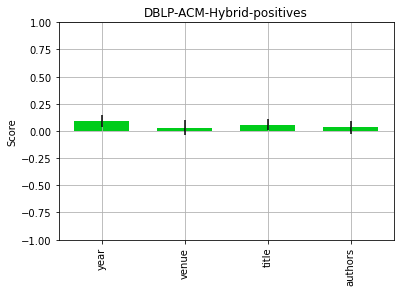

In [41]:
chart(tp_result,(1,1,1),(-1,1),title='DBLP-ACM-Hybrid-positives')

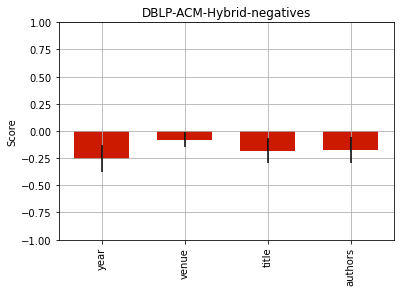

In [42]:
chart(tn_result,(1,1,1),(-1,1),title='DBLP-ACM-Hybrid-negatives')

In [44]:
tp_result.to_csv('dblp_acm_mojito_positives.csv',index=False)
tn_result.to_csv('dblp_acm_mojito_negatives.csv',index=False)

## Fodors-Zagats

In [4]:
data = pd.read_csv('datasets/Structured/Fodors-Zagats/fod_zag_test.csv',dtype=str)
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('models/fod_zag_hybrid.pth')
proba = wrap_dm(model)(data)
tp_group = data[(proba[:, 1] >= 0.5) & (data['label'] == '1')]
tn_group = data[(proba[:, 0] >= 0.5) & (data['label'] == '0')]

len(tp_group), len(tn_group)

(21, 167)

In [5]:
mojito = Mojito(data.columns,
                attr_to_copy = 'left',
                split_expression = " ",
                class_names = ['no_match', 'match'], 
                feature_selection = "lasso_path")

In [6]:
tp_result = mojito.drop(wrap_dm(model),
                        tp_group,
                        num_features = 20,
                        num_perturbation = 500)

Explaining 0/21
Explaining 1/21
Explaining 2/21
Explaining 3/21
Explaining 4/21
Explaining 5/21
Explaining 6/21
Explaining 7/21
Explaining 8/21
Explaining 9/21
Explaining 10/21
Explaining 11/21
Explaining 12/21
Explaining 13/21
Explaining 14/21
Explaining 15/21
Explaining 16/21
Explaining 17/21
Explaining 18/21
Explaining 19/21
Explaining 20/21


In [7]:
tn_result = mojito.copy(wrap_dm(model),
                        tn_group,
                        num_features = 20,
                        num_perturbation = 100)

Explaining 0/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.962e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.809e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.915e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.458e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.345e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.723e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 3/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.407e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.704e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 4/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.206e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.603e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 5/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=8.959e-03, previous alpha=8.938e-03, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 6/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.204e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.319e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 7/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.369e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.844e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 8/167
Explaining 9/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.637e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.318e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 10/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.559e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=7.796e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 11/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.152e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.076e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 12/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.402e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.701e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 13/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.364e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.682e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 14/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.605e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.302e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 15/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=6.404e-03, previous alpha=3.802e-03, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 16/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.483e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.742e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 17/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.208e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.104e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 18/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.794e-02, previous alpha=1.513e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 19/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.587e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.440e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 20/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.080e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.127e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 21/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.626e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.131e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 22/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.357e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.679e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 23/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.982e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.911e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 24/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.778e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=8.889e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 25/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.384e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.922e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 26/167
Explaining 27/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.262e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.310e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 28/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.382e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.191e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 29/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.591e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.296e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 30/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.074e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.371e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 31/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.416e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.208e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 32/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.295e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.648e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 33/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.099e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.550e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 34/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.147e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.073e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 35/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.169e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.585e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 36/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.239e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 6 iterations, alpha=4.874e-04, previous alpha=4.583e-04, with an active set of 7 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 37/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.044e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.522e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 38/167
Explaining 39/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.071e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.536e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 40/167
Explaining 41/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.385e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.192e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 42/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.711e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.356e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 43/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.037e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=1.714e-03, previous alpha=1.037e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 44/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.026e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.132e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 45/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.165e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.029e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 46/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.159e-02, previous alpha=1.542e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 47/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=8.601e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.300e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 48/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.139e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.070e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 49/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.558e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.790e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 50/167
Explaining 51/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.785e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.923e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 52/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.538e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.691e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 53/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=3.952e-03, previous alpha=3.853e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 54/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.418e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.209e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 55/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.886e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.431e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 56/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.825e-02, previous alpha=1.522e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 57/167
Explaining 58/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.296e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.148e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 59/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.044e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.522e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 60/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.125e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.062e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 61/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.082e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.408e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 62/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.375e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.876e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 63/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.360e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.800e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 64/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.587e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.293e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 65/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.325e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.662e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 66/167
Explaining 67/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.601e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.800e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 68/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.202e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.101e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 69/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.115e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.058e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 70/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.338e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.669e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 71/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.631e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.154e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 72/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.244e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.122e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 73/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.011e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.506e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 74/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.792e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.960e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 75/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.161e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.580e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 76/167
Explaining 77/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.295e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.476e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 78/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.924e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.462e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 79/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.822e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.411e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 80/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.838e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.919e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 81/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.409e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.205e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 82/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.036e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.018e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 83/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.603e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.017e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 84/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.161e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.581e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 85/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 10 iterations, alpha=7.534e-04, previous alpha=7.534e-04, with an active set of 11 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 86/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.390e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.195e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 87/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.893e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.946e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 88/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.506e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.289e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 89/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.019e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.509e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 90/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.447e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.235e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 91/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=3.173e-02, previous alpha=1.768e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 92/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.328e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=5.450e-03, previous alpha=2.328e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 93/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.501e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.750e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 94/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.386e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.157e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 95/167
Explaining 96/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.519e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=9.344e-02, previous alpha=3.259e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 97/167
Explaining 98/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.541e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=1.806e-02, previous alpha=1.770e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 99/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.183e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.914e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 100/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.630e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.315e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 101/167
Explaining 102/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.497e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.749e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 103/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.617e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.809e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 104/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.560e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.780e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 105/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.742e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.871e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 106/167
Explaining 107/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.823e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.224e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as t

Explaining 108/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.543e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.543e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 109/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.356e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.779e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 110/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.662e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.831e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 111/167
Explaining 112/167
Explaining 113/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.241e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.621e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 114/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.889e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.944e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 115/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.397e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.699e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 116/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.852e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.426e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 117/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.017e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.509e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 118/167
Explaining 119/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.247e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.123e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 120/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.125e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.563e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 121/167
Explaining 122/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.756e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.378e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 123/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.192e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.182e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 124/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.318e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.814e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 125/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.082e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.409e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 126/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.677e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.385e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 127/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.126e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.563e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 128/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.631e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.942e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 129/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.162e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.081e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 130/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.060e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.530e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 131/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.258e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=6.920e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 132/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.210e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.105e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 133/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.064e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.064e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 134/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.086e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.043e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 135/167
Explaining 136/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.655e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.328e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 137/167
Explaining 138/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.932e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.466e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 139/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.135e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.068e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 140/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.031e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.515e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 141/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.092e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.459e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 142/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.837e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=1.435e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 143/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.855e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.928e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 144/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=9.378e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.689e-05, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 145/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.708e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.354e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 146/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.054e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.027e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 147/167
Explaining 148/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.840e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.920e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 149/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.538e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.769e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 150/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.816e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.908e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 151/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.096e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.548e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 152/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.171e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.586e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 153/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.897e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.875e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 154/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.362e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.362e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 155/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.072e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.036e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 156/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.538e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.277e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 157/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.453e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.726e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 158/167
Explaining 159/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.362e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.181e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 160/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.124e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=6.238e-02, previous alpha=2.562e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 161/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.673e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.837e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 162/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.187e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.593e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 163/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.964e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.982e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 164/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.126e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.563e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 165/167
Explaining 166/167


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=2.199e-04, previous alpha=1.359e-04, with an active set of 9 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


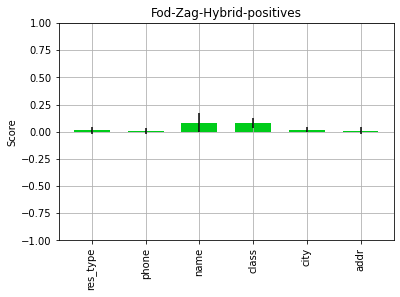

In [8]:
chart(tp_result,(1,1,1),(-1,1),title='Fod-Zag-Hybrid-positives')

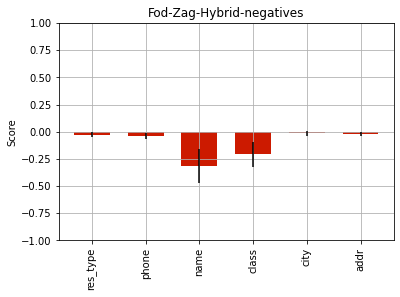

In [9]:
chart(tn_result,(1,1,1),(-1,1),title='Fod-Zag-Hybrid-negatives')

## Amazon-Google

In [20]:
data = pd.read_csv('datasets/Structured/Amazon-Google/merged_test.csv',dtype=str)
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('models/amazongoogle_hybrid.pth')
proba = wrap_dm(model)(data)
tp_group = data[(proba[:, 1] >= 0.5) & (data['label'] == '1')]
tn_group = data[(proba[:, 0] >= 0.5) & (data['label'] == '0')]

len(tp_group), len(tn_group)

(181, 1933)

In [21]:
mojito = Mojito(data.columns,
                attr_to_copy = 'left',
                split_expression = " ",
                class_names = ['no_match', 'match'], 
                feature_selection = "lasso_path")

In [22]:
tp_result = mojito.drop(wrap_dm(model),
                        tp_group,
                        num_features = 20,
                        num_perturbation = 500)

Explaining 0/181
Explaining 1/181
Explaining 2/181
Explaining 3/181
Explaining 4/181
Explaining 5/181
Explaining 6/181
Explaining 7/181
Explaining 8/181
Explaining 9/181
Explaining 10/181
Explaining 11/181
Explaining 12/181
Explaining 13/181
Explaining 14/181
Explaining 15/181
Explaining 16/181
Explaining 17/181
Explaining 18/181
Explaining 19/181
Explaining 20/181
Explaining 21/181
Explaining 22/181
Explaining 23/181
Explaining 24/181
Explaining 25/181
Explaining 26/181
Explaining 27/181
Explaining 28/181
Explaining 29/181
Explaining 30/181
Explaining 31/181
Explaining 32/181
Explaining 33/181
Explaining 34/181
Explaining 35/181
Explaining 36/181
Explaining 37/181
Explaining 38/181
Explaining 39/181
Explaining 40/181
Explaining 41/181
Explaining 42/181
Explaining 43/181
Explaining 44/181
Explaining 45/181
Explaining 46/181
Explaining 47/181
Explaining 48/181
Explaining 49/181
Explaining 50/181
Explaining 51/181
Explaining 52/181
Explaining 53/181
Explaining 54/181
Explaining 55/181
Ex

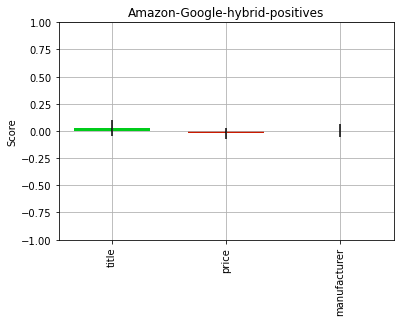

In [23]:
chart(tp_result,(1,1,1),(-1,1),title='Amazon-Google-hybrid-positives')

## Beer

In [24]:
data = pd.read_csv('datasets/Structured/Beer/beer_test.csv',dtype=str)
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('models/beer_hybrid.pth')
proba = wrap_dm(model)(data)
tp_group = data[(proba[:, 1] >= 0.5) & (data['label'] == '1')]
tn_group = data[(proba[:, 0] >= 0.5) & (data['label'] == '0')]

len(tp_group), len(tn_group),len(data)

(12, 70, 91)

In [25]:
mojito = Mojito(data.columns,
                attr_to_copy = 'left',
                split_expression = " ",
                class_names = ['no_match', 'match'], 
                feature_selection = "lasso_path")

In [26]:
tp_result = mojito.drop(wrap_dm(model),
                        tp_group,
                        num_features = 20,
                        num_perturbation = 500)

Explaining 0/12
Explaining 1/12
Explaining 2/12
Explaining 3/12
Explaining 4/12
Explaining 5/12
Explaining 6/12
Explaining 7/12
Explaining 8/12
Explaining 9/12
Explaining 10/12
Explaining 11/12


In [27]:
tn_result = mojito.copy(wrap_dm(model),
                        tn_group,
                        num_features = 20,
                        num_perturbation = 100)

Explaining 0/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.744e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.372e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1/70
Explaining 2/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=4.260e-03, previous alpha=4.260e-03, with an active set of 6 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 3/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.791e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.895e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 4/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.405e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.702e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 5/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.640e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.320e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 6/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.023e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.012e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 7/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.922e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.461e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 8/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.176e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.588e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 9/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=8.903e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.451e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 10/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.615e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.928e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 11/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.081e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.081e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 12/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.793e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.896e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 13/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.245e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=1.623e-02, previous alpha=1.623e-02, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 14/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.246e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.123e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 15/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.197e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.197e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 16/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.955e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.775e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 17/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.150e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.075e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 18/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.021e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.511e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 19/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.401e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.104e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 20/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.335e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.168e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 21/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.341e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.671e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 22/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.613e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.306e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 23/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.724e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.622e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 24/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.182e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.182e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 25/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.830e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.415e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 26/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.053e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.527e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 27/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.132e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=7.493e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 28/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.263e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=6.313e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 29/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.946e-03, previous alpha=1.878e-03, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 30/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.629e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.780e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 31/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.282e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.412e-05, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 32/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.842e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.842e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 33/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.276e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.138e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 34/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.788e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.894e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 35/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.477e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.855e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 36/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.541e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.541e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 37/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.218e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.297e-02, previous alpha=1.276e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 38/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.564e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.264e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 39/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=2.707e-02, previous alpha=2.662e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 40/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.347e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=6.347e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 41/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.347e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.293e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 42/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.922e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.702e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 43/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.862e-02, previous alpha=1.862e-02, with an active set of 5 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 44/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.491e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.100e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 45/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.382e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.191e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 46/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.448e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.448e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 47/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.243e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.188e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 48/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.296e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.148e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 49/70
Explaining 50/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.672e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.672e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 51/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.654e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.327e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 52/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.285e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.142e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 53/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.183e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=4.548e-03, previous alpha=2.091e-03, with an active set of 4 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 54/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.874e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.372e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 55/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.188e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.094e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 56/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.498e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.749e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 57/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.973e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.487e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 58/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.117e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.558e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 59/70
Explaining 60/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.246e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.229e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 61/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.243e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.217e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 62/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 2 iterations, alpha=5.522e-03, previous alpha=5.496e-03, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 63/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.011e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.005e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 64/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.214e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.248e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 65/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.439e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.439e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 66/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.733e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.733e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 67/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.058e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.058e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 68/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.872e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.936e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 69/70


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=8.763e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.381e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

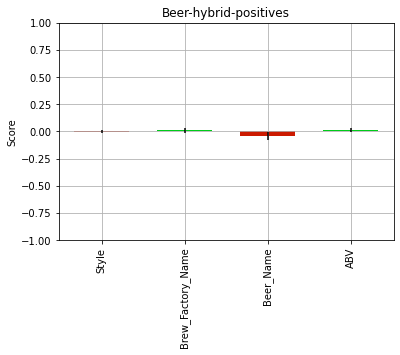

In [29]:
chart(tp_result,(1,1,1),(-1,1),title='Beer-hybrid-positives')

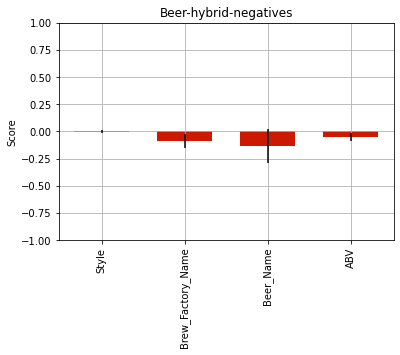

In [30]:
chart(tn_result,(1,1,1),(-1,1),title='Beer-hybrid-negatives')

## Beer second model

In [31]:
data = pd.read_csv('datasets/Structured/Beer/beer_test.csv',dtype=str)
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('models/beer_hybrid2.pth')
proba = wrap_dm(model)(data)
tp_group = data[(proba[:, 1] >= 0.5) & (data['label'] == '1')]
tn_group = data[(proba[:, 0] >= 0.5) & (data['label'] == '0')]

len(tp_group), len(tn_group),len(data)

(10, 71, 91)

In [32]:
mojito = Mojito(data.columns,
                attr_to_copy = 'left',
                split_expression = " ",
                class_names = ['no_match', 'match'], 
                feature_selection = "lasso_path")

In [ ]:
tp_result = mojito.drop(wrap_dm(model),
                        tp_group,
                        num_features = 20,
                        num_perturbation = 500)

Explaining 0/10
Explaining 1/10
Explaining 2/10
Explaining 3/10


In [33]:
tn_result = mojito.copy(wrap_dm(model),
                        tn_group,
                        num_features = 20,
                        num_perturbation = 100)

Explaining 0/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.882e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.441e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 1/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.800e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.002e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 2/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.283e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.824e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 3/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.845e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.422e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 4/71
Explaining 5/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.320e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.601e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 6/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.237e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.619e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 7/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.149e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.075e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 8/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.507e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.254e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 9/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.557e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.557e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 10/71
Explaining 11/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.995e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.977e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 12/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.014e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.507e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 13/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.018e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.090e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 14/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=6.816e-04, previous alpha=5.549e-04, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 15/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.896e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.948e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 16/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.249e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.625e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 17/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.388e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.194e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 18/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.042e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.521e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 19/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.108e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.542e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 20/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.820e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.099e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 21/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.012e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.006e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 22/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.326e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.326e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 23/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=1.187e-03, previous alpha=1.187e-03, with an active set of 8 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 24/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.363e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.181e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 25/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.765e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.826e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 26/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.402e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.012e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 27/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.641e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.821e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 28/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.372e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.686e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 29/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.521e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.441e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 30/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.868e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.338e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 31/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.733e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.366e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 32/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:602: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 9 iterations, alpha=1.381e-03, previous alpha=9.332e-04, with an active set of 10 regressors.
  warnings.warn('Early stopping the lars path, as the residues '


Explaining 33/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.017e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.008e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 34/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.802e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.771e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 35/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.135e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.157e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 36/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.692e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.346e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 37/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.161e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.081e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 38/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.476e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.954e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 39/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.543e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.717e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 40/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.952e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.476e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 41/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.906e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.046e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 42/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=8.004e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.002e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 43/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.746e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.730e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 44/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.274e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.552e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 45/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.590e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.711e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 46/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.525e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.763e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 47/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=9.183e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.591e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 48/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.316e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.658e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 49/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.187e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.326e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 50/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.667e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.833e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 51/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.359e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.179e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 52/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.782e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.891e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 53/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.203e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.102e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 54/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.696e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.848e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 55/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.194e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.597e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 56/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.284e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.642e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 57/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.207e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.037e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 58/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.274e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.368e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 59/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.185e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.592e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 60/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.206e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.206e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 61/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.181e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.626e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 62/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.857e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.287e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 63/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.000e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.500e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 64/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.219e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.110e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


Explaining 65/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=3.822e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.800e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 66/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.498e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.491e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 67/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.667e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.138e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 68/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.124e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.062e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 69/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.283e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=6.739e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat

Explaining 70/71


/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.160e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.080e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/home/nvidia/anaconda3/envs/testenv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:575: ConvergenceWarning: Regressors in active set degenerat